In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./spam_clean.csv')

In [3]:
df.head(20)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [11]:
df.shape

(5572, 2)

In [4]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
from prepare import basic_clean, lemmatize, remove_stopwords

def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

clean('Good morning ada! Were doing data exploration!')

'good morning ada datum exploration'

In [ ]:
# df.text = df.text.apply(clean)

In [8]:
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)

In [11]:
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [15]:
all_freq = pd.Series(all_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
ham_freq = pd.Series(ham_text.split()).value_counts()

In [26]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))
word_counts

,all,spam,ham
0,3,3,0
008704050406,2,2,0
0089my,1,1,0
0121,1,1,0
01223585236,1,1,0
01223585334,2,2,0
0125698789,1,0,1
02,1,1,0
020603,4,4,0
0207,2,2,0


In [28]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1133,147,986
not,1106,55,1051
get,697,94,603
call,649,366,284
go,630,35,595
2,478,173,305
ur,384,144,240
no,333,60,273
come,324,6,318
4,287,119,168


In [29]:
word_counts['p_spam'] = word_counts.spam / word_counts['all']
word_counts['p_ham'] = word_counts.ham / word_counts['all']
word_counts

,all,spam,ham,p_spam,p_ham
0,3,3,0,1.000000,0.000000
008704050406,2,2,0,1.000000,0.000000
0089my,1,1,0,1.000000,0.000000
0121,1,1,0,1.000000,0.000000
01223585236,1,1,0,1.000000,0.000000
01223585334,2,2,0,1.000000,0.000000
0125698789,1,0,1,0.000000,1.000000
02,1,1,0,1.000000,0.000000
020603,4,4,0,1.000000,0.000000
0207,2,2,0,1.000000,0.000000


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

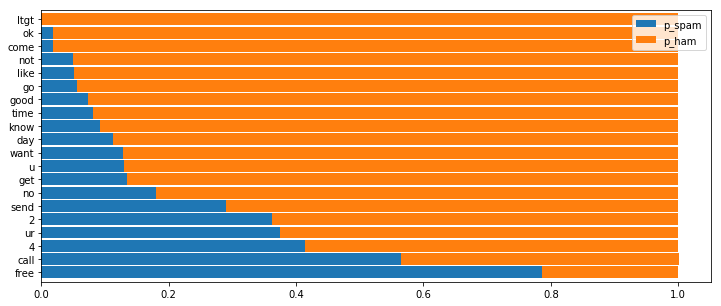

In [34]:
word_counts.sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize=(12, 5), width=.9)

In [38]:
word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]\
    .assign(ratio=lambda df: df.spam / df.ham)\
    .sort_values(by='ratio')

,all,spam,ham,p_spam,p_ham,ratio
not,1106,55,1051,0.049729,0.950271,0.052331
like,251,13,238,0.051793,0.948207,0.054622
go,630,35,595,0.055556,0.944444,0.058824
good,276,20,256,0.072464,0.927536,0.078125
think,200,15,185,0.075000,0.925000,0.081081
make,176,14,162,0.079545,0.920455,0.086420
time,234,19,215,0.081197,0.918803,0.088372
tell,209,18,191,0.086124,0.913876,0.094241
see,207,19,188,0.091787,0.908213,0.101064
know,283,26,257,0.091873,0.908127,0.101167


(-0.5, 1199.5, 999.5, -0.5)

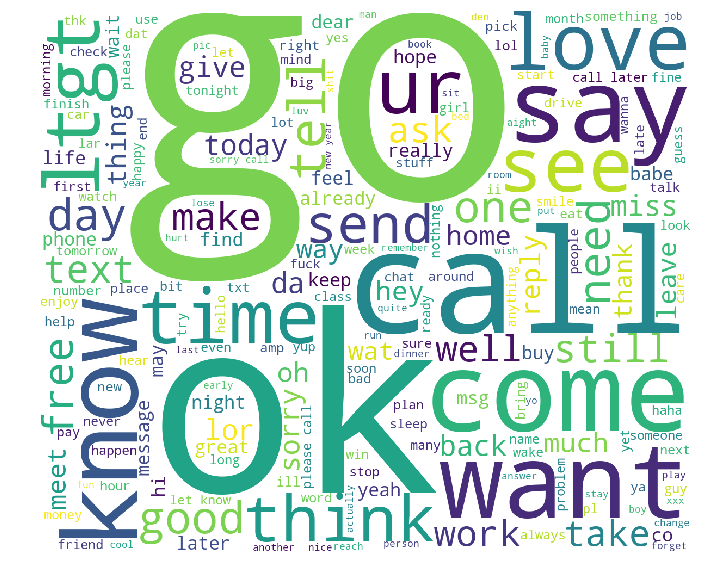

In [43]:
# pip install WordCloud
from wordcloud import WordCloud

cloud = WordCloud(background_color='white', width=1200, height=1000).generate(all_text)
plt.figure(figsize=(12, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1199.5, 999.5, -0.5)

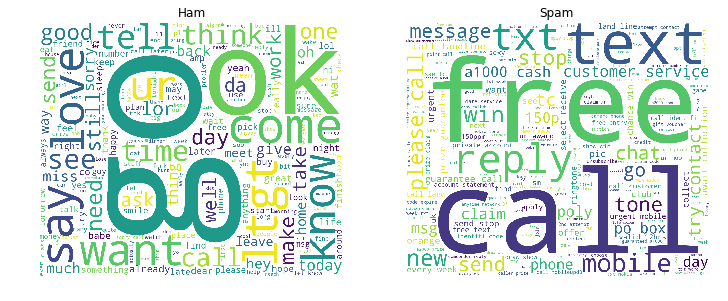

In [46]:
ham_cloud = WordCloud(background_color='white', width=1200, height=1000).generate(ham_text)
spam_cloud = WordCloud(background_color='white', width=1200, height=1000).generate(spam_text)

plt.figure(figsize=(12, 10))

plt.subplot(121)
plt.imshow(ham_cloud)
plt.title('Ham')
plt.axis('off')

plt.subplot(122)
plt.imshow(spam_cloud)
plt.title('Spam')
plt.axis('off')

In [53]:
import nltk

pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(please, call)         53
(call, later)          52
(not, know)            46
(u, r)                 41
(let, know)            41
(r, u)                 40
(sorry, call)          38
(not, get)             36
(u, get)               35
(not, go)              33
(go, 2)                33
(u, not)               32
(new, year)            32
(good, morning)        31
(wan, 2)               31
(customer, service)    29
(take, care)           26
(po, box)              25
(u, know)              25
(try, contact)         24
dtype: int64

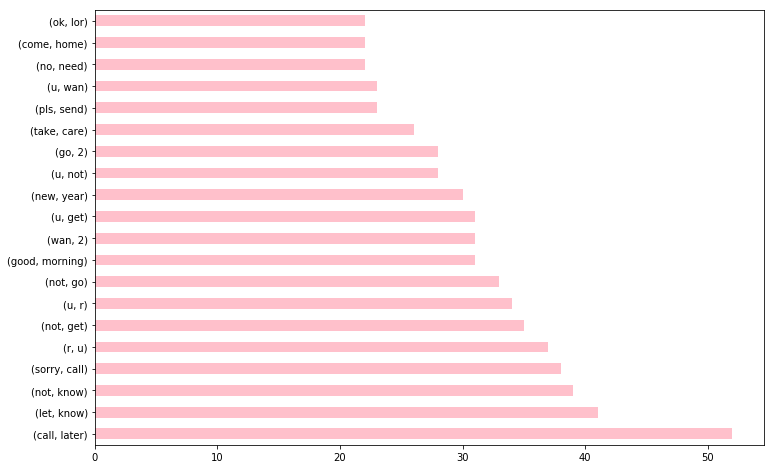

In [58]:
ham_bigrams = pd.Series(nltk.ngrams(ham_text.split(), 2))\
    .value_counts()

ham_bigrams\
    .head(20)\
    .plot.barh(figsize=(12, 8), color='pink')

In [64]:
frequencies = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

(-0.5, 1199.5, 799.5, -0.5)

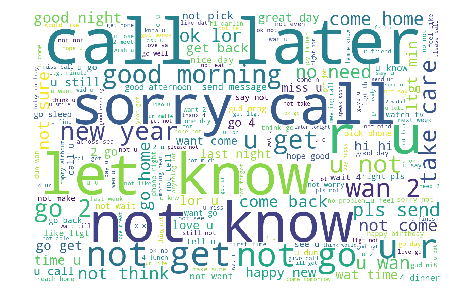

In [65]:
cloud = WordCloud(height=800, width=1200, background_color='white')
ham_cloud = cloud.generate_from_frequencies(frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(ham_cloud)
plt.axis('off')